In [101]:
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [60]:
#Import the handwritten digits dataset.
digits = load_digits()

In [61]:
#Examine dataset dimensions.
digits.images.shape

(1797, 8, 8)

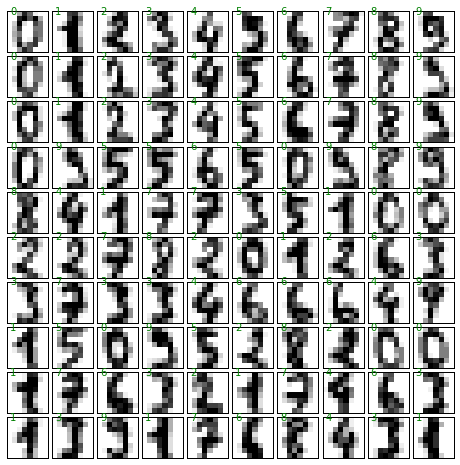

In [62]:
#Visualize the sample data (images).

#Create grid.
fig, ax = plt.subplots(10, 10, figsize = (8, 8),
                      subplot_kw = {'xticks': [],
                                    'yticks': []},
                                   gridspec_kw = dict(hspace = 0.1,
                                                     wspace = 0.1))
#Display the images inside the grid.
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], 
               cmap = 'binary',
              interpolation = 'nearest')
    axi.text(0.05, 0.05,
             str(digits.target[i]),
             #transform = ax.transAxes,
             color = 'green')

In [63]:
##1.Choose a Class of Model:  Manifold Learning (Isomap) as trail run. 

In [64]:
from sklearn.manifold import Isomap

In [65]:
##2.Choose the Models Hyperparameters:

In [66]:
iso = Isomap(n_components = 2)

In [67]:
##3.Separate the Dataset into a Feature Matrix and Target Array/Vector:

In [68]:
X = digits.data
y = digits.target

In [69]:
#Examine the feature matrix's dimensions.
X.shape

(1797, 64)

In [70]:
#Examine target array's dimensions.
y.shape

(1797,)

In [71]:
##4.Fit the Model to the Data:

In [72]:
iso.fit(X)

Isomap()

In [73]:
##5.Apply the Model to New Data/Transform old data:

In [75]:
data_projected = iso.transform(X)

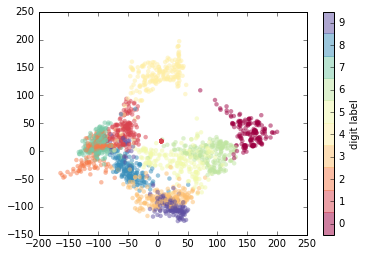

In [77]:
#View images via a colormap.
plt.scatter(data_projected[:, 0], data_projected[:, 1],
           c = y, edgecolor = 'none', alpha = 0.5,
            cmap = plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label = 'digit label', ticks = range(10))
plt.clim(-0.5, 9.5)

In [ ]:
##1.Choose a Class of Model:  MGaussian Naive Bayes Model

In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
##2.Choose the Models Hyperparameters:

In [80]:
model = GaussianNB()

In [81]:
##3b.Split the Feature Matrix and Target Array/Vector into test and training data:

In [87]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)

In [88]:
##4.Fit the Model to the Data:

In [89]:
model.fit(Xtrain, ytrain)

GaussianNB()

In [90]:
##5.Apply the Model to New Data/Transform old data:

In [91]:
y_model = model.predict(Xtest)

In [95]:
##6.Gauge the Accuracy of the Prediction:

In [96]:
accuracy_score(ytest, y_model)

0.8333333333333334

In [98]:
#Create confusion matrix.
mat = confusion_matrix(ytest, y_model)

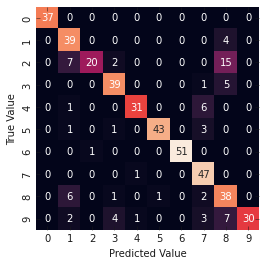

In [104]:
#Display the confusion matrix.
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value');

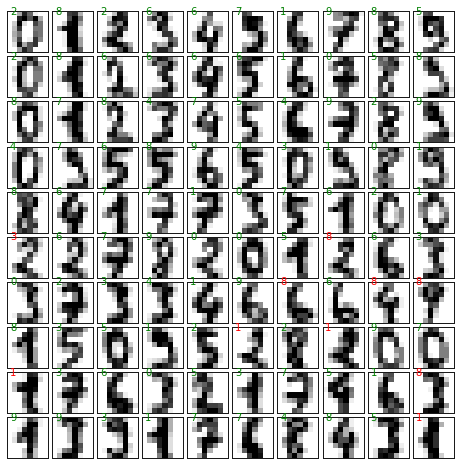

In [106]:
#Visualize the images withe their predicted labels.

#Create grid.
fig, ax = plt.subplots(10, 10, figsize = (8, 8),
                      subplot_kw = {'xticks': [],
                                    'yticks': []},
                                   gridspec_kw = dict(hspace = 0.1,
                                                     wspace = 0.1))
#Display the images inside the grid.
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], 
               cmap = 'binary',
              interpolation = 'nearest')
    axi.text(0.05, 0.05,
             str(y_model[i]),
             #transform = ax.transAxes,
             color = 'green' if (ytest[i] == y_model[i]) else 'red')